In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from 2 countries (you can do more later)
us = pd.read_csv(r"C:\Users\Administrator\Downloads\archive\USvideos.csv")
in_ = pd.read_csv(r"C:\Users\Administrator\Downloads\archive\INvideos.csv")

# Add country tag
us['country'] = 'US'
in_['country'] = 'IN'

# Combine
df = pd.concat([us, in_], ignore_index=True)

# Check missing values
df.isnull().sum()

# Drop columns you don’t need
df = df.drop(['video_id', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description'], axis=1)

df.head()


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,video_error_or_removed,country
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,US
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,US
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,US
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,US
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,US


Text(0.5, 1.0, 'Top Categories by Count')

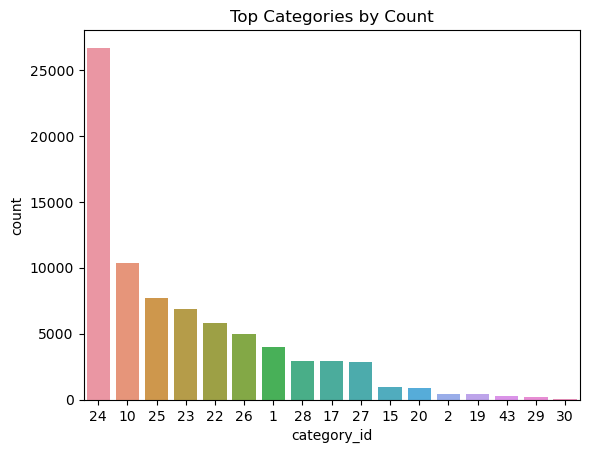

In [15]:
# Top categories
sns.countplot(data=df, x='category_id', order=df['category_id'].value_counts().index)
plt.title("Top Categories by Count")



<Axes: xlabel='views', ylabel='likes'>

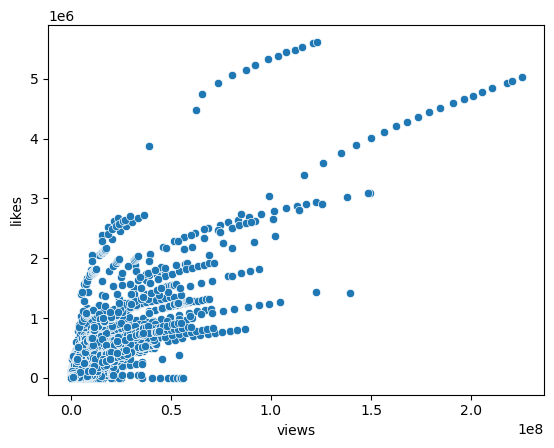

In [16]:
# Views vs. Likes
sns.scatterplot(data=df, x='views', y='likes')

Sentiment Analysis on Titles & Tags
Use VADER (for social media text):



<Axes: title={'center': 'Sentiment of Video Titles'}>

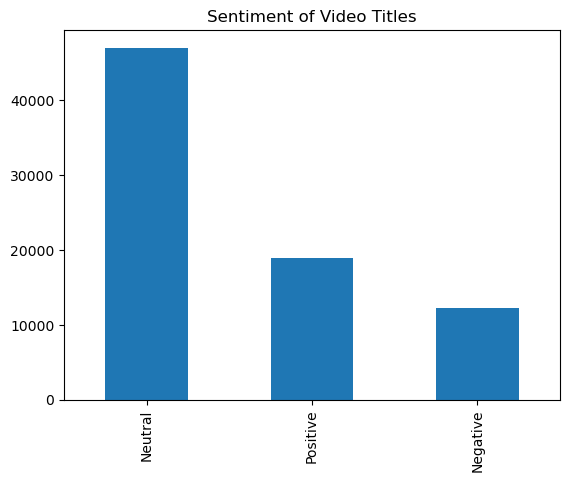

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment score on video titles
df['title_sentiment'] = df['title'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Label sentiment
def label_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['title_sentiment'].apply(label_sentiment)

# Count sentiment
df['sentiment_label'].value_counts().plot(kind='bar', title="Sentiment of Video Titles")


In [18]:
df.groupby('category_id')['views'].mean().sort_values(ascending=False)


category_id
10    4.867738e+06
30    3.065001e+06
1     2.780741e+06
20    2.736060e+06
17    1.991190e+06
24    1.376697e+06
28    1.342658e+06
2     1.208499e+06
23    1.162518e+06
29    1.083682e+06
22    1.076671e+06
26    9.649146e+05
19    8.412962e+05
15    8.337289e+05
43    7.293242e+05
27    4.599944e+05
25    4.487616e+05
Name: views, dtype: float64

Time-Series Plots (Trending Duration)
-calculate how long a video stays trending:

Text(0.5, 1.0, 'How Many Days Videos Trend')

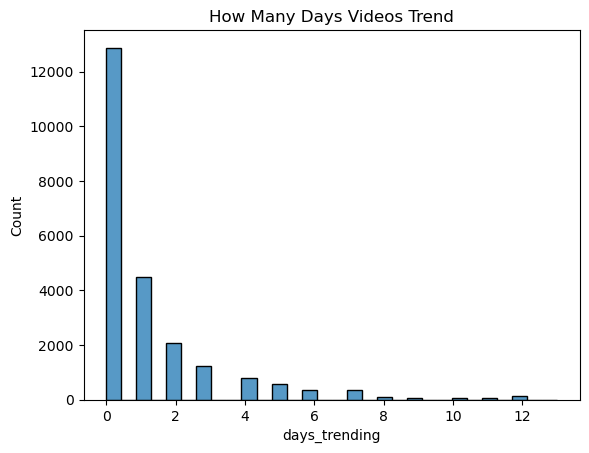

In [21]:
# Convert trending date
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')

# Count how many times a video_id appears = days it was trending
trending_days = df.groupby(['title', 'country'])['trending_date'].nunique().reset_index()
trending_days.columns = ['title', 'country', 'days_trending']

# Plot
sns.histplot(trending_days['days_trending'], bins=30)
plt.title("How Many Days Videos Trend")
